<a href="https://colab.research.google.com/github/Harit0710/Machine-learning/blob/main/EDA_nd_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load and sanity

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("/content/framingham_heart_disease.csv")

In [6]:
# Shape of dataset
print("Dataset shape:", df.shape)

Dataset shape: (4238, 16)


In [7]:
# First 5 rows
print("\nPreview of dataset:")
display(df.head())


Preview of dataset:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
# Info about datatypes & non-null counts
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 K

In [9]:
# Summary statistics for numeric columns
print("\nSummary statistics:")
display(df.describe(include="all"))


Summary statistics:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [11]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Target distribution:
 TenYearCHD
0    3594
1     644
Name: count, dtype: int64

Target distribution (%):
 TenYearCHD
0    84.804153
1    15.195847
Name: proportion, dtype: float64


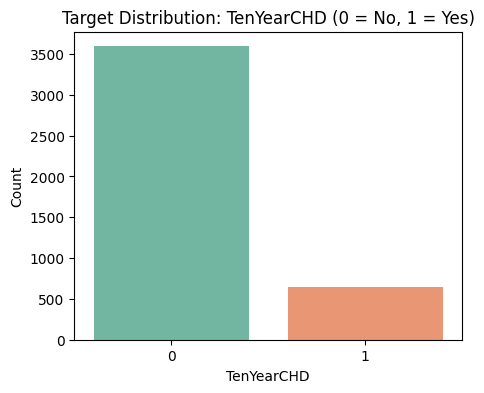

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution of target column
print("Target distribution:\n", df["TenYearCHD"].value_counts())

# Percentage distribution
print("\nTarget distribution (%):\n", df["TenYearCHD"].value_counts(normalize=True)*100)

# Plot
plt.figure(figsize=(5,4))
sns.countplot(x="TenYearCHD", data=df, palette="Set2")
plt.title("Target Distribution: TenYearCHD (0 = No, 1 = Yes)")
plt.xlabel("TenYearCHD")
plt.ylabel("Count")
plt.show()

Numeric columns: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


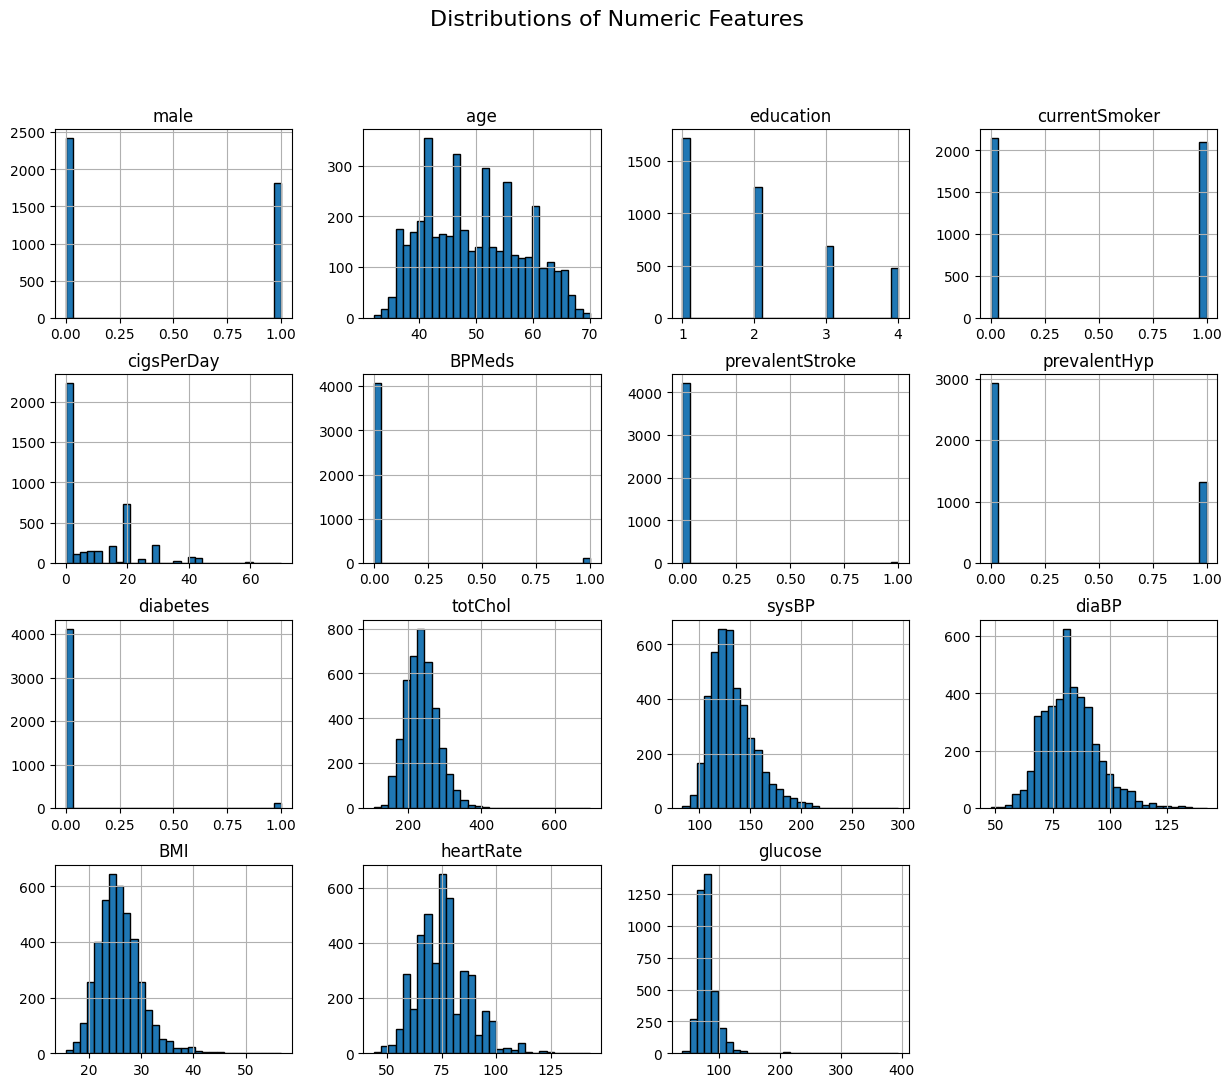

In [13]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns.drop("TenYearCHD")

print("Numeric columns:", list(numeric_cols))

# Plot histograms for all numeric features
import matplotlib.pyplot as plt

df[numeric_cols].hist(figsize=(15,12), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numeric Features", size=16)
plt.show()


Here, we’ll use boxplots to compare distributions of numeric features between the two classes:

TenYearCHD = 0 (no heart disease)

TenYearCHD = 1 (heart disease within 10 years)

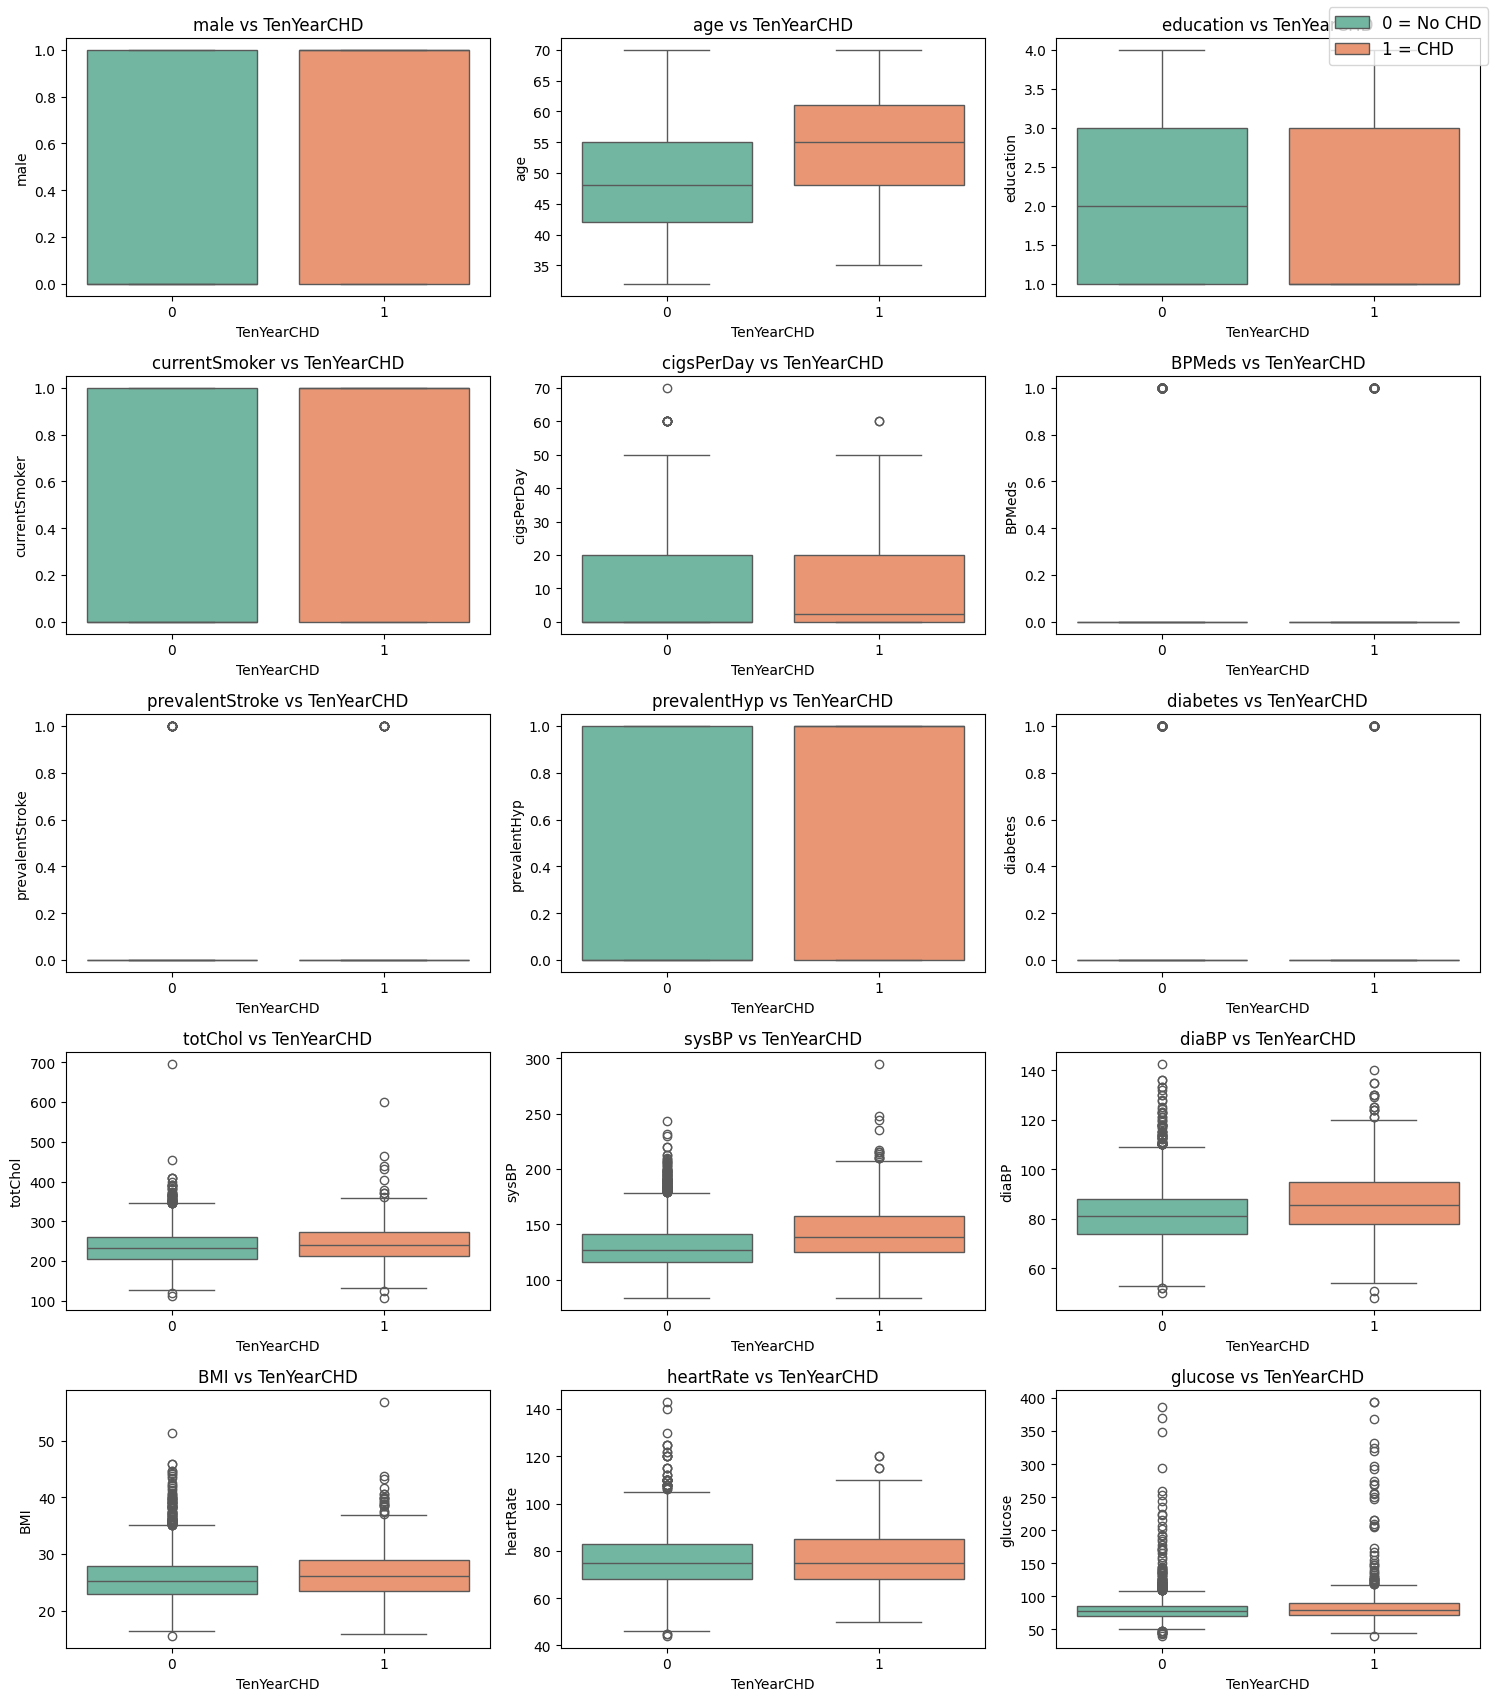

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=["int64","float64"]).columns.drop("TenYearCHD")

plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    ax = sns.boxplot(x="TenYearCHD", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs TenYearCHD")

# Add one global legend for all plots
plt.figlegend(labels=["0 = No CHD", "1 = CHD"], loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()


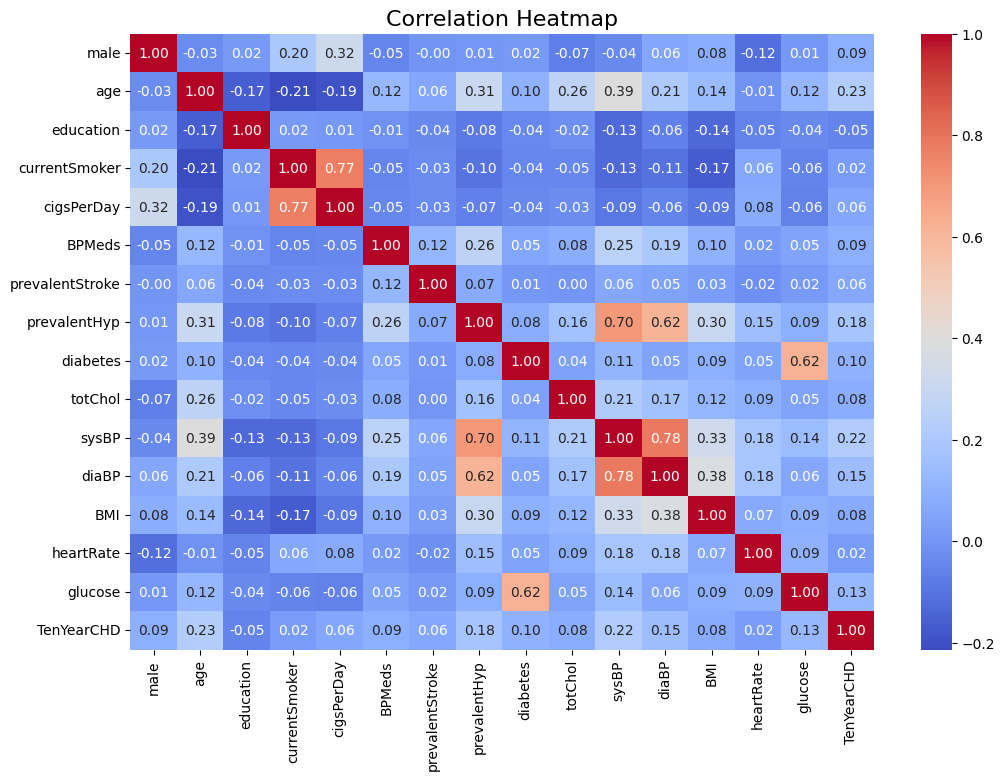

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlations for numeric features (including target)
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [16]:


# ---------------------------
# 1. Education (categorical) → Mode
# ---------------------------
df['education'].fillna(df['education'].mode()[0], inplace=True)

# ---------------------------
# 2. cigsPerDay (numeric but linked to smoker)
# ---------------------------
df.loc[(df['currentSmoker'] == 0) & (df['cigsPerDay'].isna()), 'cigsPerDay'] = 0
df.loc[(df['currentSmoker'] == 1) & (df['cigsPerDay'].isna()), 'cigsPerDay'] = df.loc[df['currentSmoker'] == 1, 'cigsPerDay'].median()

# ---------------------------
# 3. BMI (numeric) → Median
# ---------------------------
df['BMI'].fillna(df['BMI'].median(), inplace=True)

# ---------------------------
# 4. Glucose (numeric) → Median
# ---------------------------
df['glucose'].fillna(df['glucose'].median(), inplace=True)

# ✅ Done: No missing values now
print(df.isnull().sum())


male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                 0
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64


In [17]:
# Categorical: Fill with mode
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

# Numerical: Fill with mean/median
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

# Check again
print(df.isnull().sum())


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


#Treating outliers

age: Outliers are unlikely (age is naturally bounded). Keep all.

cigsPerDay: Very high smokers may exist (40+ cigarettes/day). Keep them (important signal).

BMI: Extremely high or low values could be genuine but rare. Instead of removing, cap them (winsorization).

sysBP & diaBP: Extreme blood pressures (e.g., >250) may be real but could also be recording errors. Usually cap.

heartRate: <30 or >200 bpm may be unrealistic. Outlier → remove or cap.

glucose: Very high glucose could mean diabetes (important!). Keep them, maybe cap extreme rare points.

totChol: Extremely high cholesterol → possible but rare. Cap instead of delete.

In [18]:


# Function to cap outliers using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

# ✅ Correct column names for Framingham dataset
cols_to_cap = ["age", "sysBP", "diaBP", "totChol", "glucose", "heartRate"]

for col in cols_to_cap:
    if col in df.columns:  # avoid KeyError if a column is missing
        df[col] = cap_outliers(df[col])

# --- Remove extreme impossible BMI values ---
df = df[(df["BMI"] >= 10) & (df["BMI"] <= 70)]

print("✅ Outlier treatment complete!")
print("Remaining shape:", df.shape)


✅ Outlier treatment complete!
Remaining shape: (4238, 16)


#EDA after data cleaning

In [19]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
# Dataset shape & info
print(df.shape)
print(df.info())

# Summary statistics
df.describe().T


(4238, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
No

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.0000,0.00,0.0,1.0000,1.0000
age,4238.0,49.584946,8.572160,32.0000,42.00,49.0,56.0000,70.0000
education,4238.0,1.954696,1.018510,1.0000,1.00,2.0,3.0000,4.0000
currentSmoker,4238.0,0.494101,0.500024,0.0000,0.00,0.0,1.0000,1.0000
cigsPerDay,4238.0,9.078339,11.913780,0.0000,0.00,0.0,20.0000,70.0000
BPMeds,4238.0,0.029259,0.168552,0.0000,0.00,0.0,0.0000,1.0000
prevalentStroke,4238.0,0.005899,0.076587,0.0000,0.00,0.0,0.0000,1.0000
prevalentHyp,4238.0,0.310524,0.462763,0.0000,0.00,0.0,1.0000,1.0000
diabetes,4238.0,0.025720,0.158316,0.0000,0.00,0.0,0.0000,1.0000
totChol,4238.0,236.191600,42.297346,122.0000,206.00,234.0,262.0000,346.0000


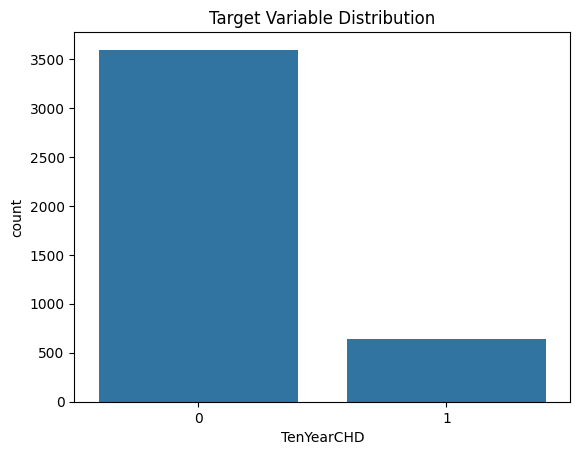

In [21]:


sns.countplot(x='TenYearCHD', data=df)
plt.title("Target Variable Distribution")
plt.show()


Univariate Analysis (Each Column Separately)

Numerical Features → histograms + boxplots.

Categorical Features → countplots.

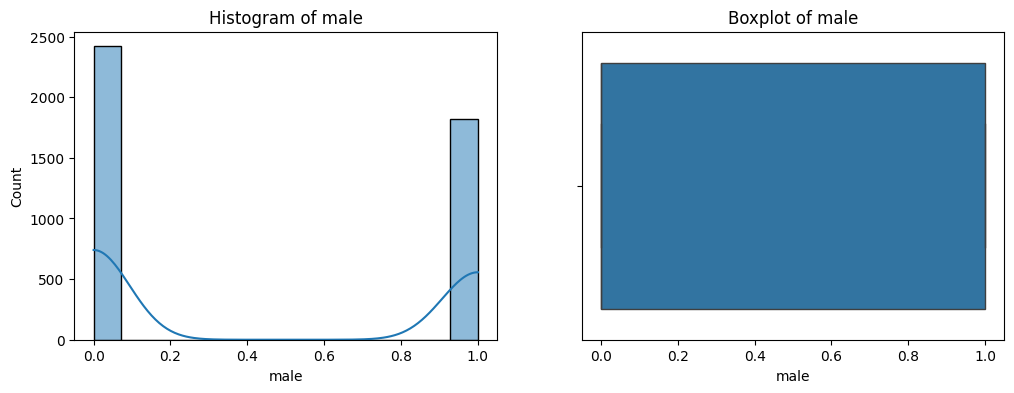

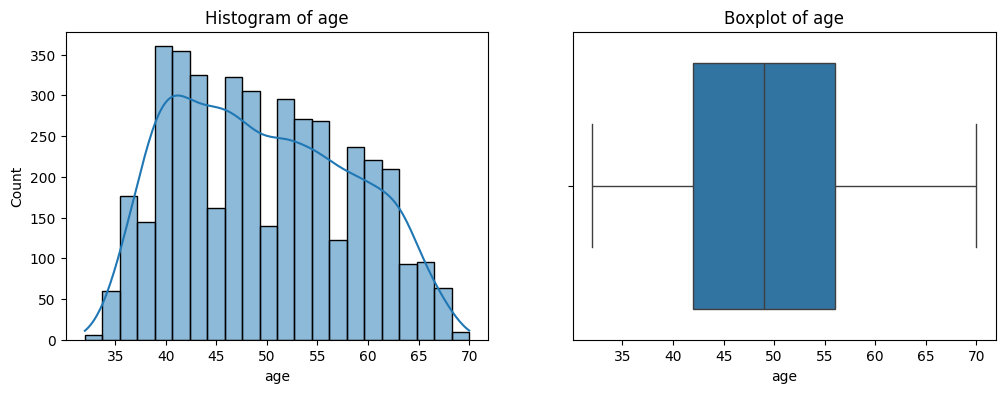

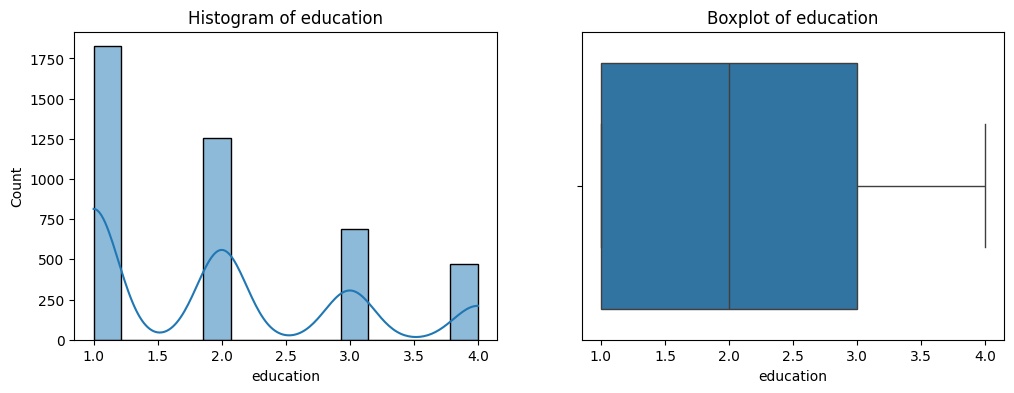

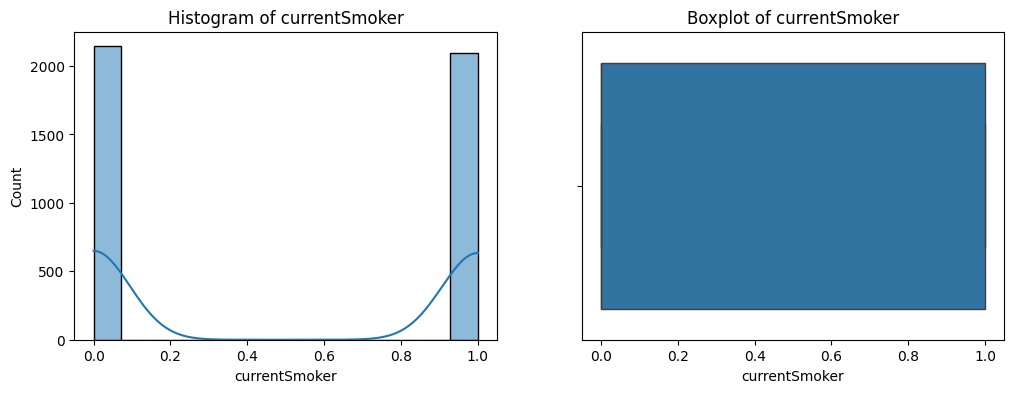

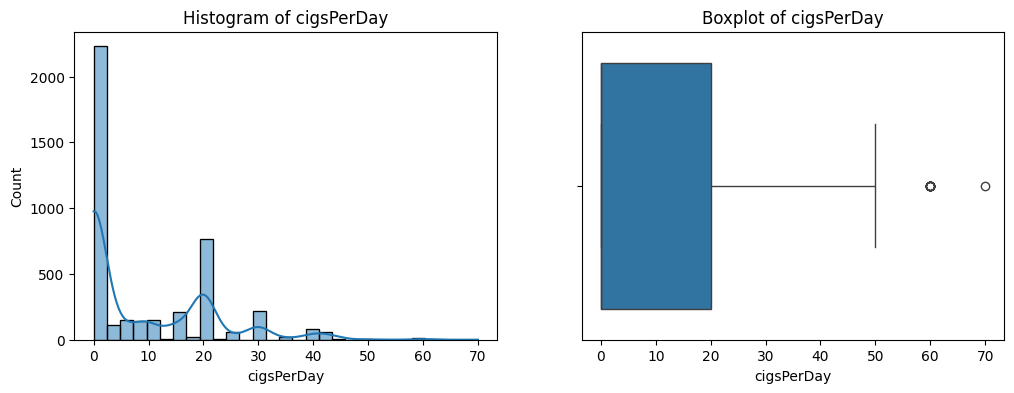

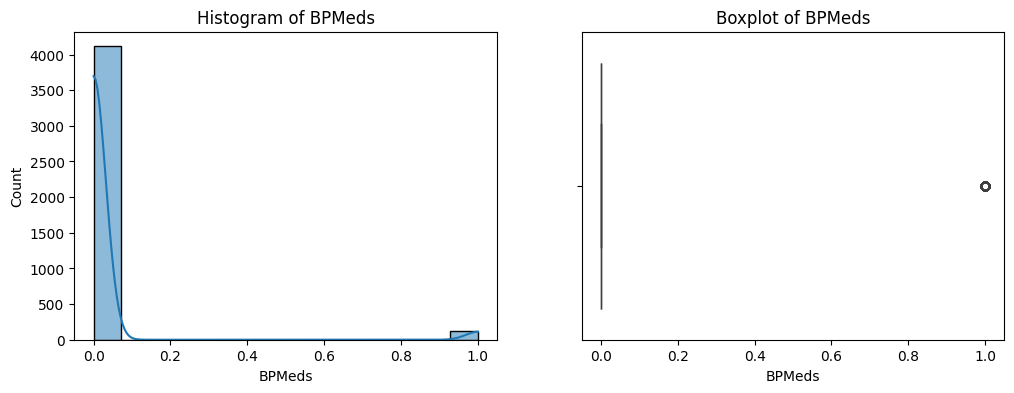

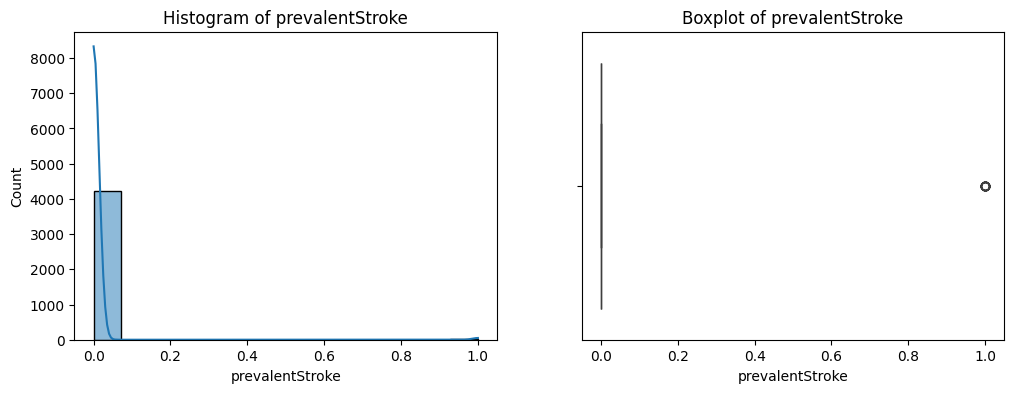

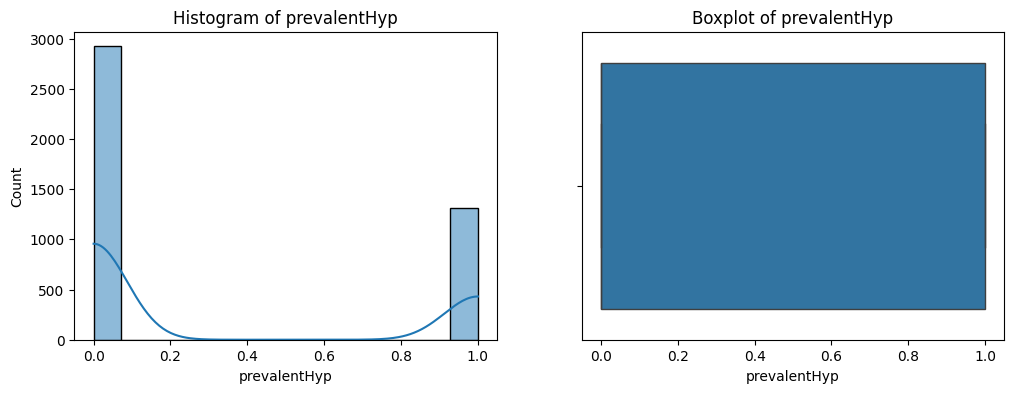

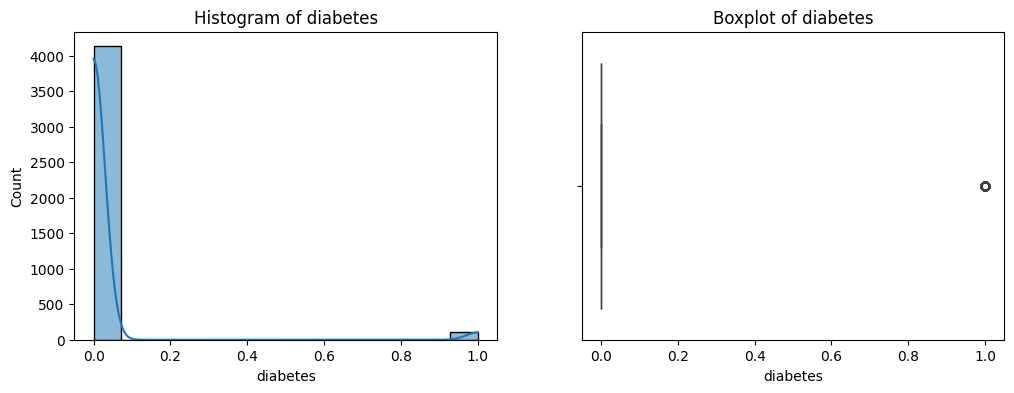

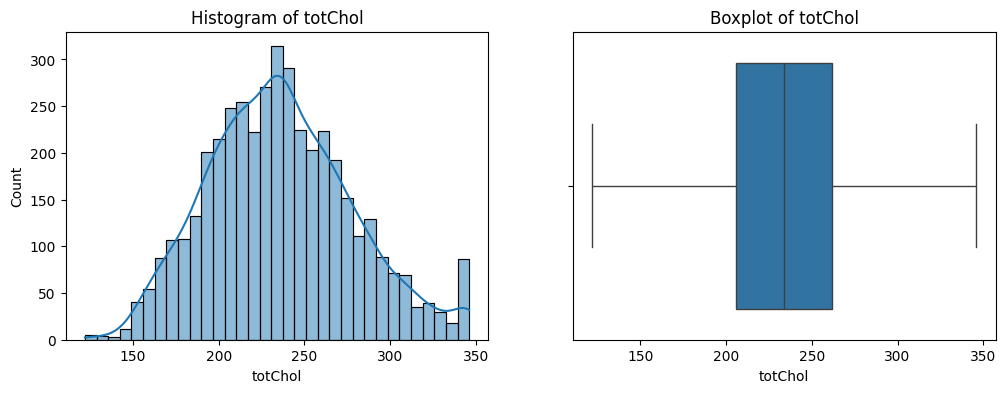

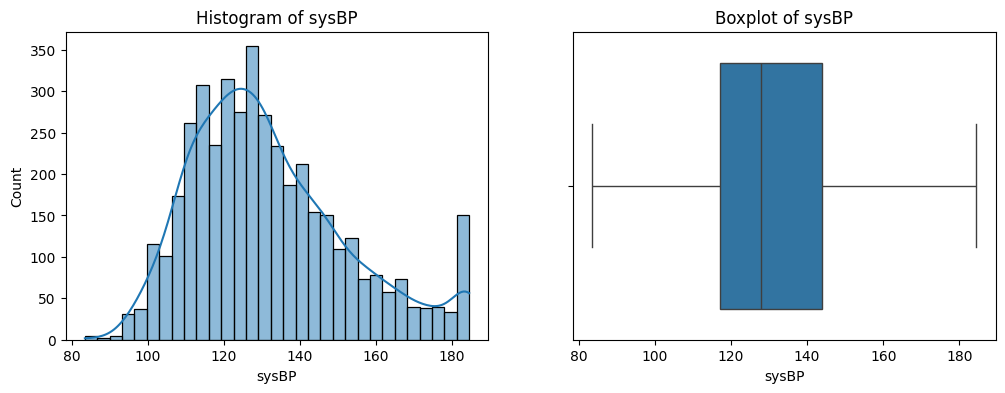

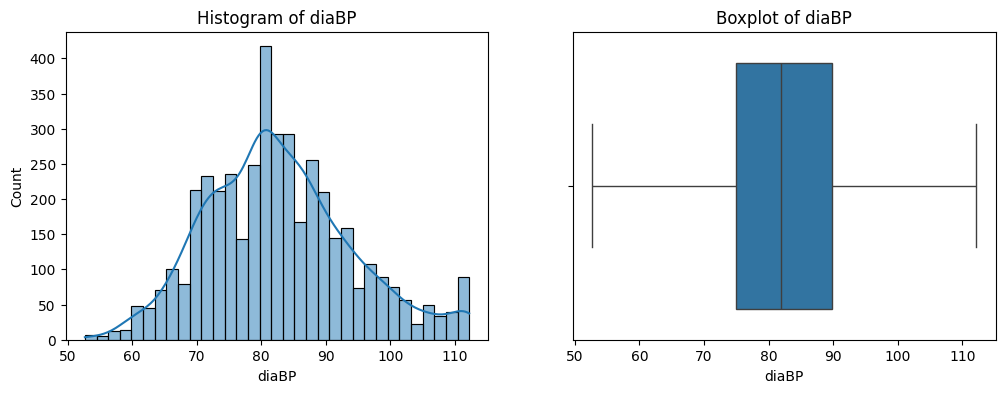

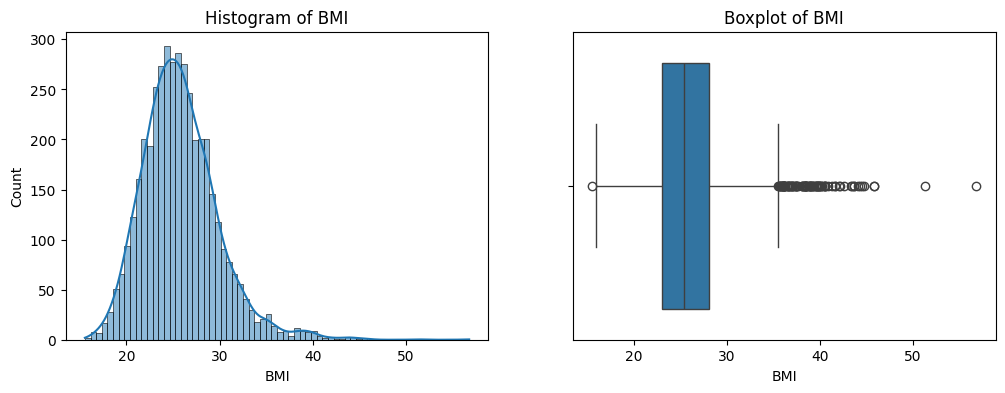

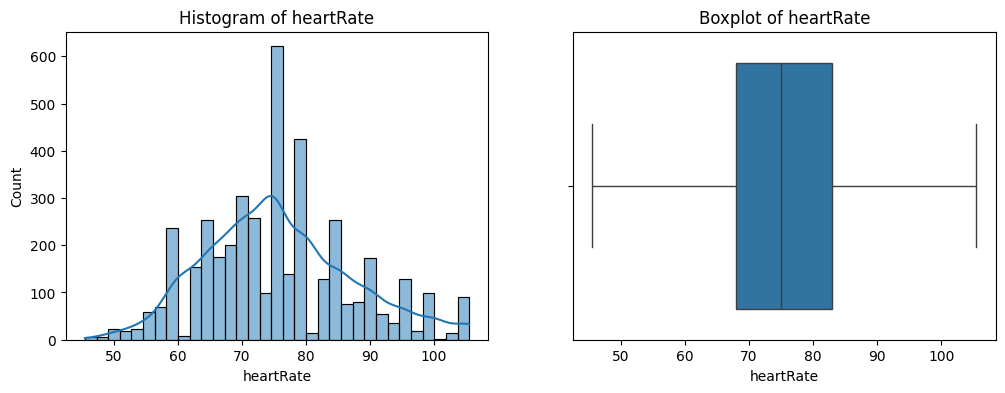

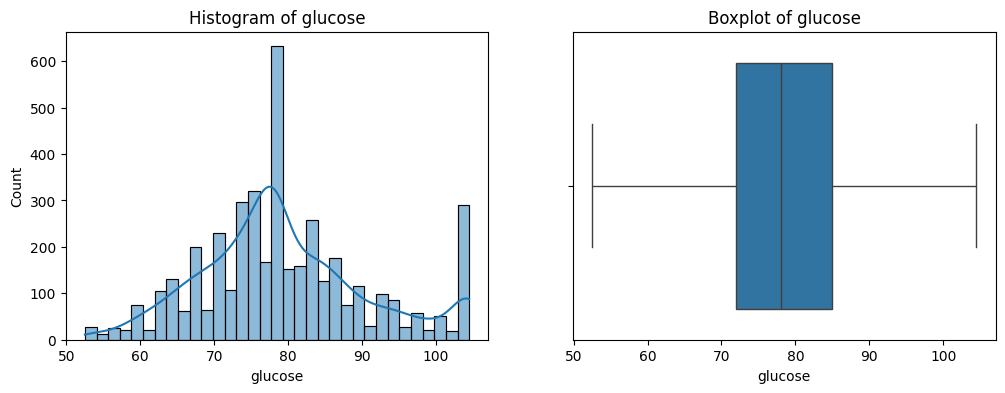

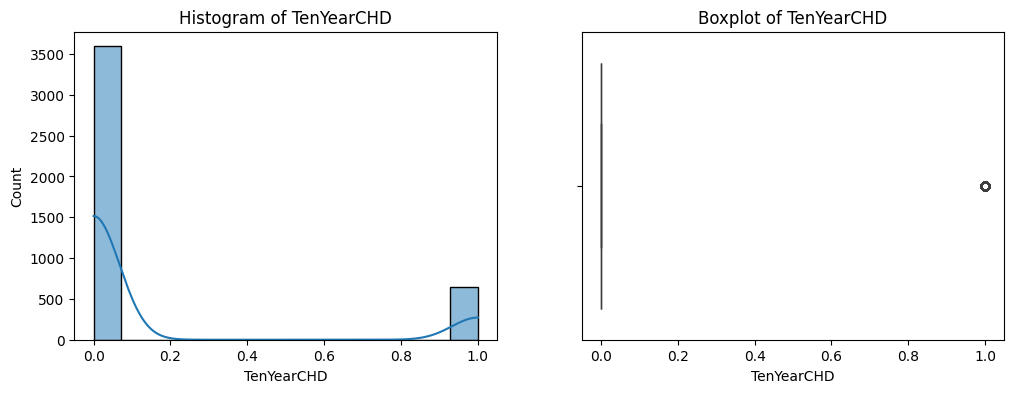

In [22]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Hist + Boxplot for numerical
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    plt.show()

# Countplots for categorical
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=30)
    plt.show()


Bivariate Analysis (Feature vs Target)

Numerical vs Target → boxplots / hist.

Categorical vs Target → stacked barplots / hue.

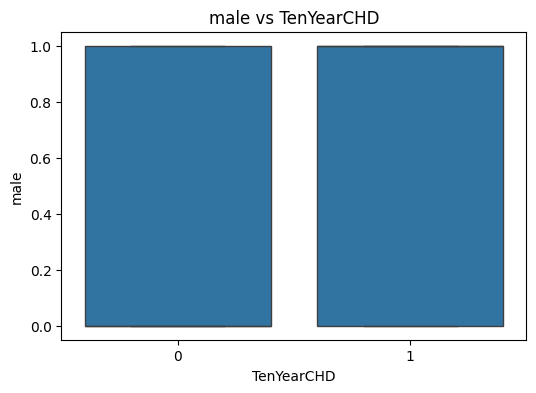

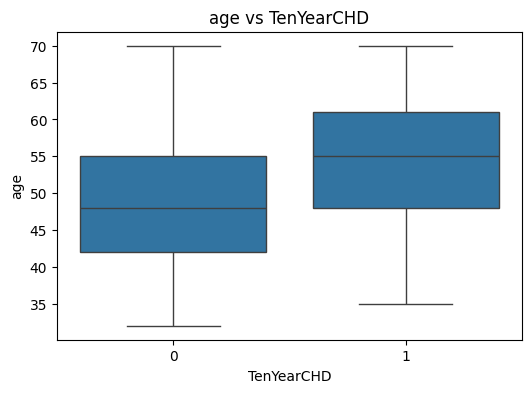

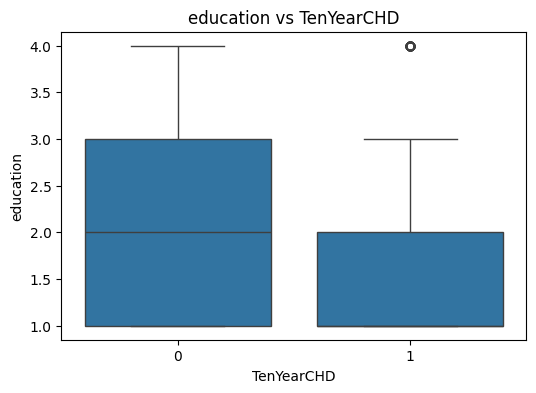

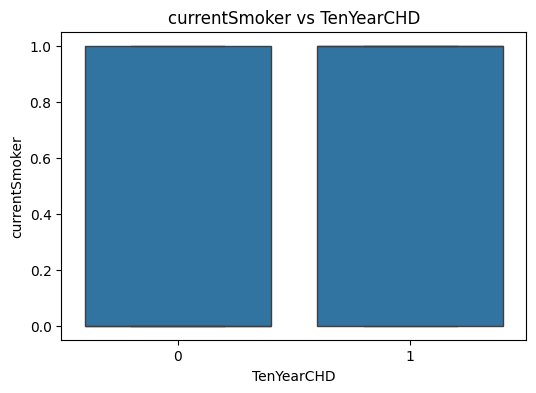

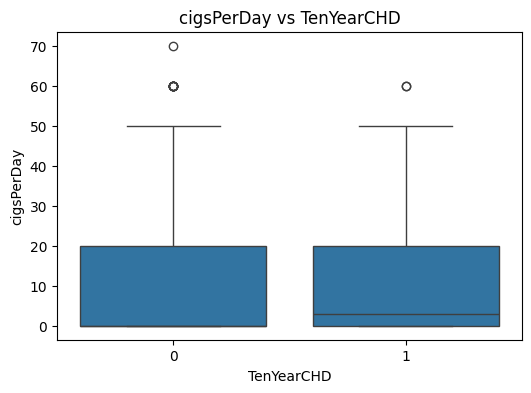

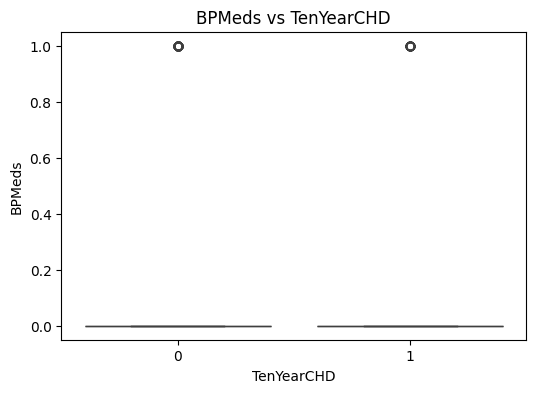

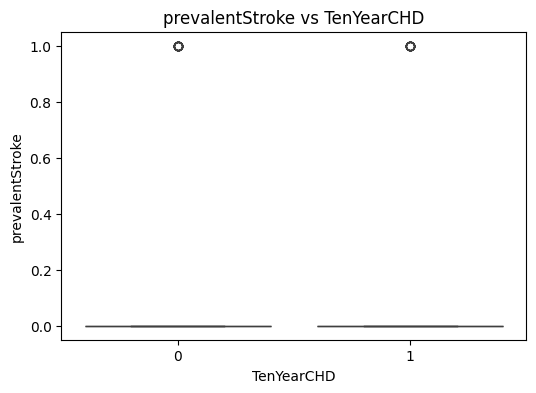

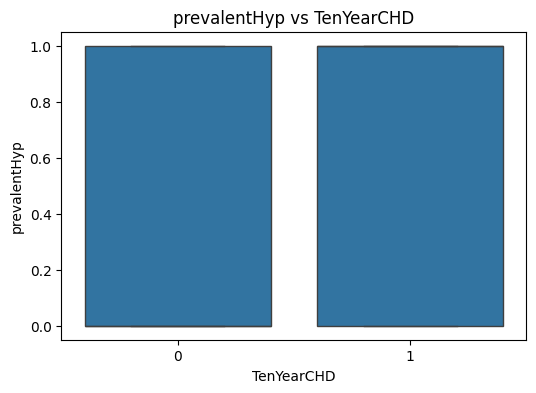

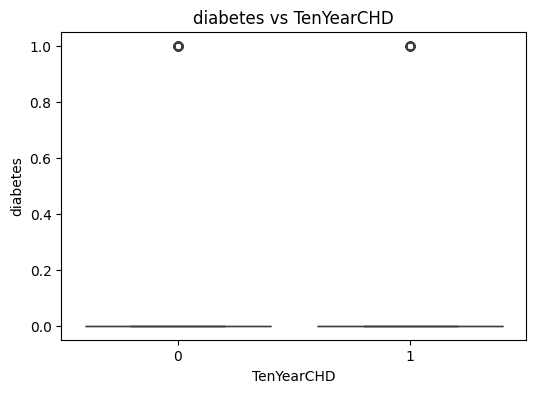

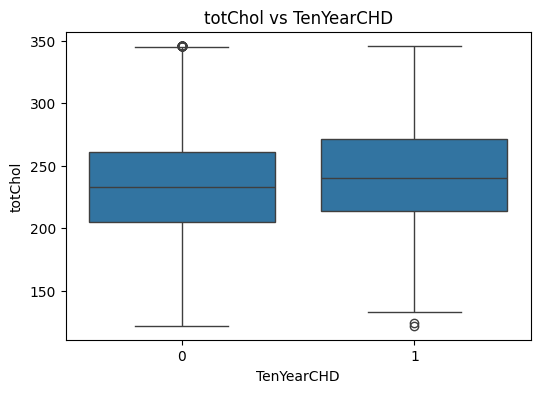

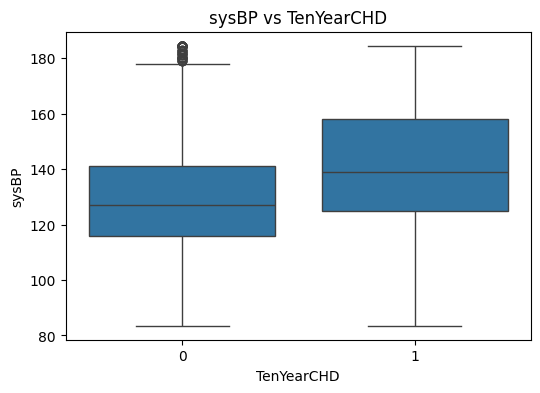

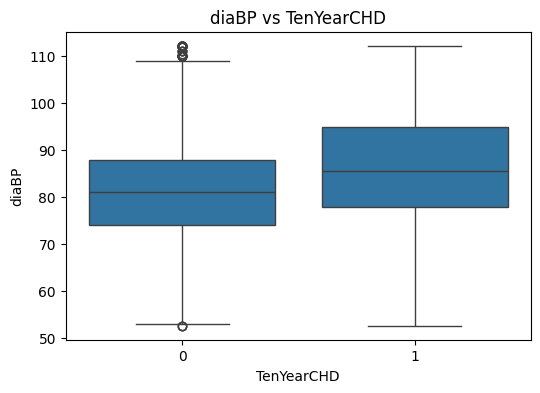

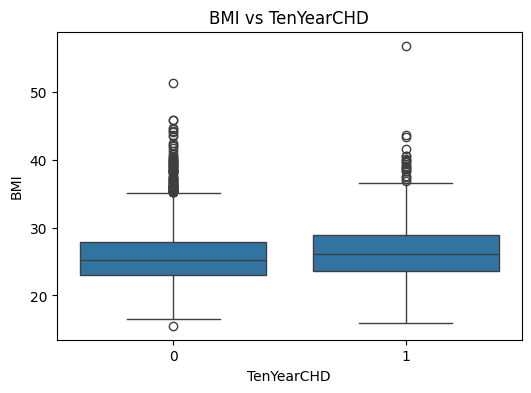

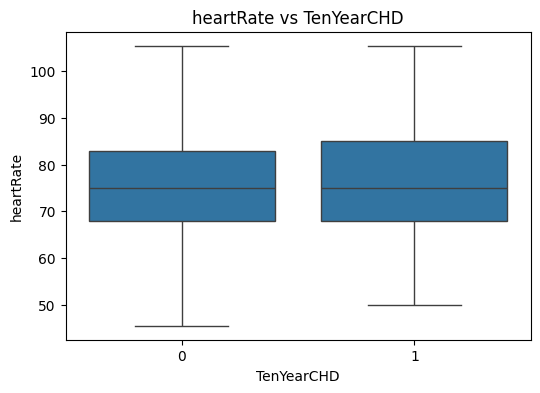

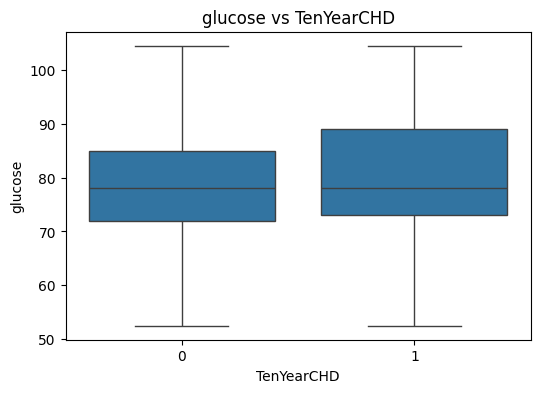

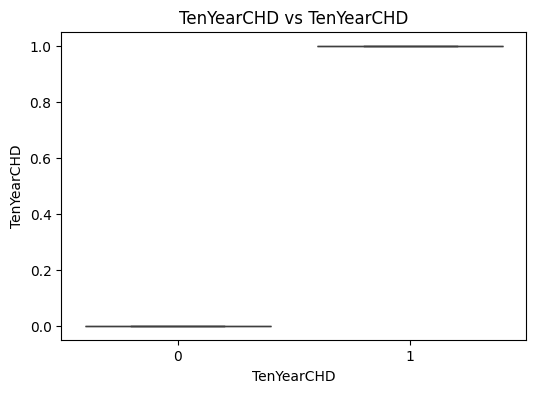

In [23]:
# Numerical vs Target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='TenYearCHD', y=col, data=df)
    plt.title(f"{col} vs TenYearCHD")
    plt.show()

# Categorical vs Target
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='TenYearCHD', data=df)
    plt.title(f"{col} vs TenYearCHD")
    plt.xticks(rotation=30)
    plt.show()


Correlation Heatmap

Numerical correlation only.

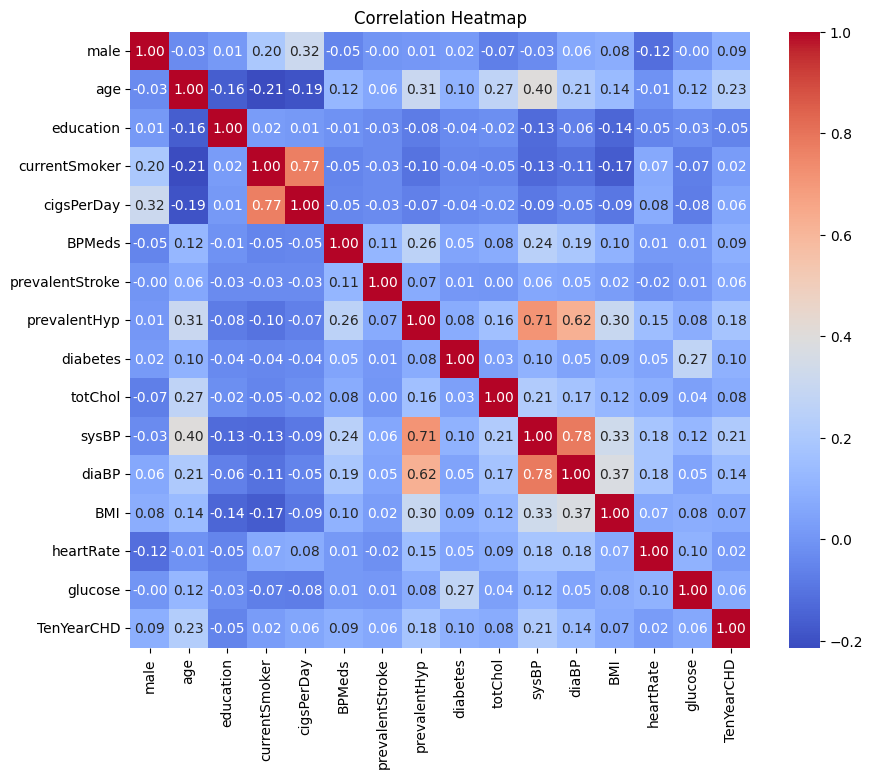

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Feature Scaling

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer



# Step 1: Separate features (X) and target (y)
X = df.drop("TenYearCHD", axis=1)  # all columns except target
y = df["TenYearCHD"]               # target column

# Step 2: Identify categorical and numerical columns
# In this dataset, most features are numeric (int/float), but some are binary (0/1).
# We'll treat all as numeric for scaling.
numeric_cols = X.columns.tolist()

# Step 3: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols)
    ]
)

# Step 4: Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)


Shape of training set: (3390, 15)
Shape of test set: (848, 15)


Deal with imbalance + train a baseline Logistic Regression model.

In [27]:
# =======================
# Logistic Regression Baseline Model (with Imputation)
# =======================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer


# Features and target
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

# Impute missing values (median for numerical columns)
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with balanced class weights
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[490 229]
 [ 55  74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78       719
           1       0.24      0.57      0.34       129

    accuracy                           0.67       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.80      0.67      0.71       848


ROC-AUC Score: 0.6981919332406119


📊 Current Results

#Confusion Matrix

[[494 225]   → True Negatives, False Positives
 [ 54  75]]  → False Negatives, True Positives


494 patients without heart disease predicted correctly (good 👍)

225 patients without heart disease misclassified as having disease (false alarms ⚠️)

75 patients with disease detected correctly (true positives 👍)

54 patients with disease missed (false negatives ❌ – dangerous in medical use case)

#Classification Report

Class 0 (No Heart Disease):

  Precision = 0.90 → when the model predicts "No disease," it’s right 90% of the time (good).

  Recall = 0.69 → it detects ~69% of the healthy patients correctly (okay, not bad).

Class 1 (Heart Disease):

  Precision = 0.25 → only 25% of predicted positives are actually correct. That’s very low – too many false positives.

  Recall = 0.58 → catches only 58% of the actual patients with disease. That means 42% are missed (big concern in healthcare).

Overall Accuracy = 67% → not terrible, but misleading in imbalanced datasets (since most are class 0).

 ROC-AUC = 0.698 (~70%) → shows the model is better than random guessing (50%), but far from "good" (~0.80+ is expected in healthcare tasks).

#✅ What’s Good
Accuracy is not horrible (67%), considering imbalance.

ROC-AUC ~0.70 shows some learning signal (not random).

Class 0 detection (healthy patients) is fairly strong → Precision = 0.90.

#❌ What’s Bad

Low Precision for Heart Disease (0.25) → too many false alarms.

Moderate Recall for Heart Disease (0.58) → missing 42% of actual patients is unacceptable in healthcare.

Accuracy is inflated by majority class (healthy people).

#🎯 What Should Ideally Happen (for medical use case)

Recall (for class 1) should be very high (0.80+ ideally), because missing sick patients is dangerous.

 Precision (for class 1) also needs improvement (0.50+ at least), to reduce false alarms.

   ROC-AUC → should be closer to 0.80–0.90 for reliable healthcare predictions.

Accuracy is less important than Recall & AUC here.

#👉 So in plain terms:
The model is good at detecting healthy people, but bad at correctly identifying sick people (heart disease). In medical predictions, recall for disease cases matters the most. Right now it’s too low.

#🚀 Next steps to improve:

Handle class imbalance (use class_weight='balanced' in LogisticRegression or try SMOTE oversampling).

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Train with class_weight balanced
log_reg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg_balanced.fit(X_train, y_train)

# Predictions
y_pred_balanced = log_reg_balanced.predict(X_test)
y_prob_balanced = log_reg_balanced.predict_proba(X_test)[:,1]

# Evaluation
print("Confusion Matrix (Balanced):\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report (Balanced):\n", classification_report(y_test, y_pred_balanced))
print("\nROC-AUC Score (Balanced):", roc_auc_score(y_test, y_prob_balanced))


Confusion Matrix (Balanced):
 [[490 229]
 [ 55  74]]

Classification Report (Balanced):
               precision    recall  f1-score   support

           0       0.90      0.68      0.78       719
           1       0.24      0.57      0.34       129

    accuracy                           0.67       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.80      0.67      0.71       848


ROC-AUC Score (Balanced): 0.6992485256223654


#SMOTE oversampling -

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train again
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_res, y_train_res)

# Predictions
y_pred_smote = log_reg_smote.predict(X_test)
y_prob_smote = log_reg_smote.predict_proba(X_test)[:,1]

# Evaluation
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))
print("\nROC-AUC Score (SMOTE):", roc_auc_score(y_test, y_prob_smote))


Confusion Matrix (SMOTE):
 [[483 236]
 [ 53  76]]

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       719
           1       0.24      0.59      0.34       129

    accuracy                           0.66       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.80      0.66      0.71       848


ROC-AUC Score (SMOTE): 0.6992269625125336


# Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)   # use balanced/smote data
X_test_scaled = scaler.transform(X_test)

# Train logistic regression on scaled data
log_reg_scaled = LogisticRegression(max_iter=1000, random_state=42)
log_reg_scaled.fit(X_train_scaled, y_train_res)

# Predictions
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)
y_proba_scaled = log_reg_scaled.predict_proba(X_test_scaled)[:,1]

# Evaluation
print("Confusion Matrix (Scaled):\n", confusion_matrix(y_test, y_pred_scaled))
print("\nClassification Report (Scaled):\n", classification_report(y_test, y_pred_scaled))
print("\nROC-AUC Score (Scaled):", roc_auc_score(y_test, y_proba_scaled))


Confusion Matrix (Scaled):
 [[484 235]
 [ 54  75]]

Classification Report (Scaled):
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       719
           1       0.24      0.58      0.34       129

    accuracy                           0.66       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.80      0.66      0.70       848


ROC-AUC Score (Scaled): 0.6975126952809134


#Hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# 1. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 2. Scale AFTER SMOTE
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)  # scale test normally

# 3. Logistic Regression + GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga']  # solvers that support L1/elasticnet
}

log_reg = LogisticRegression(max_iter=5000)

grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train_res_scaled, y_train_res)

print("Best Params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

# 4. Evaluate on Test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:,1]

print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC: 0.737000529300567
Test ROC-AUC: 0.6984075643389289
Confusion Matrix:
 [[483 236]
 [ 54  75]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       719
           1       0.24      0.58      0.34       129

    accuracy                           0.66       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.80      0.66      0.70       848



#🎯 Final Steps for Logistic Regression (Heart Disease Dataset)
1. Feature Scaling (Standardization)

Logistic regression is sensitive to scale.

Scale all numeric features → mean 0, variance 1.

Library: StandardScaler from sklearn.

✅ This helps optimization and ensures coefficients are comparable.

2. Handle Class Imbalance (Class Weights)

Your dataset likely has more “no disease” than “disease”.

Logistic regression lets us set class_weight='balanced'.

✅ This tells the model to pay more attention to minority class.

3. Hyperparameter Tuning

Tune C (inverse of regularization strength) → controls how much penalty for large weights.

Try values like [0.01, 0.1, 1, 10].

Use GridSearchCV or manual loop.

✅ This squeezes best decision boundary.

4. Threshold Tuning

Logistic regression outputs probabilities.

By default, >0.5 = disease. But with imbalance, this is suboptimal.

Find the threshold that gives the best F1-score or Recall (depending on goal).

✅ For healthcare, recall (catching actual positives) is usually more important.

5. Final Evaluation

Use:

Confusion matrix

Precision, Recall, F1

ROC-AUC

✅ This gives a fair picture beyond accuracy.

In [32]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# =========================
# 1. Define features & target
# =========================
X = df.drop("TenYearCHD", axis=1)   # input features
y = df["TenYearCHD"]                # target variable

# =========================
# 2. Train-test split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# =========================
# 3. Handle imbalance (SMOTE)
# =========================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# =========================
# 4. Feature Scaling
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# =========================
# 5. Logistic Regression with Hyperparameter Tuning
# =========================
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]  # works with both l1 and l2
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)

grid = GridSearchCV(
    log_reg, param_grid, scoring="roc_auc", cv=5, n_jobs=-1, verbose=1
)
grid.fit(X_train_scaled, y_train_res)

# =========================
# 6. Best model
# =========================
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

print("Best Params:", grid.best_params_)
print("Best ROC-AUC (Train CV):", grid.best_score_)
print("Test ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC (Train CV): 0.7322319848771267
Test ROC-AUC: 0.6237560781015838

Confusion Matrix:
 [[481 238]
 [ 65  64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76       719
           1       0.21      0.50      0.30       129

    accuracy                           0.64       848
   macro avg       0.55      0.58      0.53       848
weighted avg       0.78      0.64      0.69       848



#🔍 Key Observations

Best Params

C = 10, penalty = l2, solver = liblinear

This means: a stronger model (less regularization) performed best.

ROC-AUC

Train CV (cross-validation): ~0.73 → model can separate classes moderately well.

Test ROC-AUC: ~0.62 → performance dropped on unseen data → some overfitting.

Confusion Matrix

[[481 238]
 [ 65  64]]


True Negatives (481): predicted no disease correctly.

False Positives (238): predicted disease, but actually no disease.

False Negatives (65): missed real disease cases.

True Positives (64): correctly predicted disease.

Classification Report

Class 0 (No CHD):

Precision = 0.88 → when the model says “No CHD”, it’s usually right.

Recall = 0.67 → it misses 33% of real negatives.

Class 1 (CHD):

Precision = 0.21 → when it predicts “CHD”, it’s wrong 79% of the time.

Recall = 0.50 → catches half of actual CHD patients.

Accuracy = 64% → misleading because dataset is imbalanced.

Macro avg (0.55 F1) → poor balance between classes.

⚠️ The Problem

The model is biased toward class 0 (No CHD).

Class 1 (CHD) detection is weak (precision 0.21, recall 0.50).

In medical prediction, recall for CHD is crucial (better to catch more patients, even with false alarms).